In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Variables:
1. oecd_icv = indice calidad de vida de la OECD
2. 

In [19]:
oecd_icv = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')

Estudiamos el dataset:

In [20]:
oecd_icv.columns

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

Podemos aprendar más información desde el sitio de la [OECD](https://stats.oecd.org/index.aspx?DataSetCode=BLI)

In [21]:
oecd_icv.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN


Importamos el Producto Interno Bruto desde el sitio del Fondo Monetario Internacional ([FMI](https://www.imf.org/en/Publications/SPROLLS/world-economic-outlook-databases#sort=%40imfdate%20descending))

In [22]:
pib_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [23]:
pib_per_capita.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [24]:
pib_per_capita.head(2)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


Crearemos una función que combine los datos de satisfacción de la OCDE y los datos del PIB per cápita del FMI. Ya nos manejamos bien con pandas, por lo que es trivial.

In [25]:
def estadisticas_pais(oecd_icv, pib_per_capita):
    oecd_icv = oecd_icv[oecd_icv["INEQUALITY"]=="TOT"]
    oecd_icv = oecd_icv.pivot(index="Country", columns="Indicator", values="Value")
    pib_per_capita.rename(columns={"2015": "PIB per capita"}, inplace=True)
    
    pib_per_capita.set_index("Country", inplace=True)
    estadistica_pais = pd.merge(left=oecd_icv, right=pib_per_capita,
                                  left_index=True, right_index=True)
    estadistica_pais.sort_values(by="PIB per capita", inplace=True)
    remover_indices = [0, 1, 6, 8, 33, 34, 35]
    mantener_indices = list(set(range(36)) - set(remover_indices))
    return estadistica_pais[["PIB per capita", 'Life satisfaction']].iloc[mantener_indices]

Preparamos los datos país

In [26]:

estadistica_paises = estadisticas_pais(oecd_icv, pib_per_capita)


In [27]:
X = np.c_[estadistica_paises["PIB per capita"]]
y = np.c_[estadistica_paises["Life satisfaction"]]

In [28]:
# Visualizar los datos

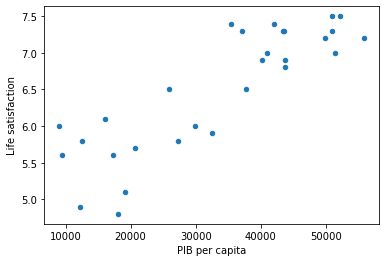

In [29]:

estadistica_paises.plot(kind='scatter', x="PIB per capita", y='Life satisfaction')
plt.show()

Parece que los datos nos muestran una tendencia a mayor PIB mayor satisfacción, parece que nuestra hipótesis se está cumpliendo.

Entrenaremos un modelo predictor

In [30]:
import sklearn.linear_model